# WeatherPy
----

### Monteiro analysis
* As expected, the weather becomes warmer as one approaches the equator (0 Deg. Latitude), and as we are close to the Spring Equinox, we would anticipate that the Southern Latitudes are warmer than the Northern Latitudes at this time of year. 
* There is no strong relationship between latitude and cloudiness. Considering that the data seems to cluster around certain y-values, it's my guess that most scientists estimate the value on a categorical scale [0, 25, 50, 75, 100]
* There is no strong relationship between latitude and wind speed. Possibly with a larger dataset there might be more definition to a curve that looks somewhat like the inverse of the temperature curve (that is, where it is cooler, there is a greater chance of higher wind, so it is more likely to be windy the farther you are from the Equator). But for now we probably can't say anything definitive..

In [1]:
# Actions in terminal before we begin

# pip install citipy
# add Weather Map api_key to config

# Dependencies and Setup
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        city = city.title()
        cities.append(city)

# Print the city count to confirm sufficient count
# Do we need to make city names Capitalized?
print(cities)



['Marsh Harbour', 'Norman Wells', 'Nyangao', 'Torbay', 'Caucaia', 'Qaanaaq', 'Ginda', 'Istanbul', 'Ushuaia', 'Nanortalik', 'Alice Springs', 'Airai', 'Lolua', 'Port Alfred', 'Santa Barbara', 'Goure', 'Punta Arenas', 'Olafsvik', 'Castro', 'Batemans Bay', 'Atar', 'Punta Arenas', 'Omboue', 'Mar Del Plata', 'Portland', 'Ribeira Grande', 'Mogadishu', 'Torbay', 'Hermanus', 'Lorengau', 'Puerto Carreno', 'Svetlogorsk', 'Chapais', 'Tuatapere', 'Mezen', 'Cape Town', 'York', 'Mataura', 'Never', 'Busselton', 'Busselton', 'Coihaique', 'Attawapiskat', 'Matay', 'Amderma', 'Ponta Do Sol', 'Tuatapere', 'Bengkulu', 'Batabano', 'Longyearbyen', 'Busselton', 'Fort Nelson', 'Mataura', 'East London', 'Souillac', 'Hermanus', 'Husavik', 'Mikhaylovka', 'Souillac', 'Airai', 'Sioux Lookout', 'Hithadhoo', 'Kemin', 'Taolanaro', 'Lompoc', 'Sambava', 'Castro', 'Fortuna', 'Mys Shmidta', 'Cape Town', 'Hithadhoo', 'Karema', 'Nizhneyansk', 'Flinders', 'Victoria', 'Tripoli', 'Los Llanos De Aridane', 'Rikitea', 'Ushuaia', '

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url


'http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q='

In [4]:
city = []
lat = []
lon = []
temp_f = []
humidity = []
cloudiness = []
wind_mph = []

print(f'Begin Data Retrival: Print Processing Record, City, & API URL')
print('______________________________________________________________')
print('')

record = 0
setnum = 1

for city in cities:
    
    if (record > 50):
        record = 0
        setnum = setnum + 1
        
    print(f'Processing Record {record}; Set #{setnum} | {city}')
    record = record + 1
    #city = city.replace(' .', '%20', n=-1, case=None, flags=0, regex=True)
    city_url = query_url + city.replace(" ", "%20")
    print(city_url)
    
    response = requests.get(query_url + city).json()
    
    if response['cod'] == 200: #checks if response is sucessfull, if other than 200, skip code below
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_f.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_mph.append(response['wind']['speed'])

Begin Data Retrival: Print Processing Record, City, & API URL
______________________________________________________________

Processing Record 0; Set #1 | Marsh Harbour
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Marsh%20Harbour
Processing Record 1; Set #1 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Norman%20Wells
Processing Record 2; Set #1 | Nyangao
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Nyangao
Processing Record 3; Set #1 | Torbay
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Torbay
Processing Record 4; Set #1 | Caucaia
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Caucaia
Processing Record 5; Set #1 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2b

Processing Record 3; Set #2 | Souillac
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Souillac
Processing Record 4; Set #2 | Hermanus
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hermanus
Processing Record 5; Set #2 | Husavik
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Husavik
Processing Record 6; Set #2 | Mikhaylovka
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mikhaylovka
Processing Record 7; Set #2 | Souillac
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Souillac
Processing Record 8; Set #2 | Airai
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Airai
Processing Record 9; Set #2 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?appid

Processing Record 6; Set #3 | Harper
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Harper
Processing Record 7; Set #3 | Ludvika
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ludvika
Processing Record 8; Set #3 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Chokurdakh
Processing Record 9; Set #3 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Tuktoyaktuk
Processing Record 10; Set #3 | Lompoc
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Lompoc
Processing Record 11; Set #3 | San Lorenzo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=San%20Lorenzo
Processing Record 12; Set #3 | Bonito
http://api.openweathermap.org/data/2.5/weather

Processing Record 9; Set #4 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mount%20Gambier
Processing Record 10; Set #4 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Guerrero%20Negro
Processing Record 11; Set #4 | Dingle
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Dingle
Processing Record 12; Set #4 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Port%20Alfred
Processing Record 13; Set #4 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Busselton
Processing Record 14; Set #4 | Ballina
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ballina
Processing Record 15; Set #4 | Vaini
http://api.openweather

Processing Record 13; Set #5 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Port%20Elizabeth
Processing Record 14; Set #5 | Saleaula
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Saleaula
Processing Record 15; Set #5 | Taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Taolanaro
Processing Record 16; Set #5 | Hilo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hilo
Processing Record 17; Set #5 | Kurunegala
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Kurunegala
Processing Record 18; Set #5 | Along
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Along
Processing Record 19; Set #5 | Ushuaia
http://api.openweathermap.org/data/2.5/weat

Processing Record 19; Set #6 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 20; Set #6 | Kulu
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Kulu
Processing Record 21; Set #6 | Svetlogorsk
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Svetlogorsk
Processing Record 22; Set #6 | Vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Vaitupu
Processing Record 23; Set #6 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mahebourg
Processing Record 24; Set #6 | Meadow Lake
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Meadow%20Lake
Processing Record 25; Set #6 | Vestmannaeyjar
http://api.openweathermap.org/data/2.5

Processing Record 22; Set #7 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ushuaia
Processing Record 23; Set #7 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Rikitea
Processing Record 24; Set #7 | Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Cape%20Town
Processing Record 25; Set #7 | Trinidad
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Trinidad
Processing Record 26; Set #7 | Acapulco
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Acapulco
Processing Record 27; Set #7 | Belushya Guba
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Belushya%20Guba
Processing Record 28; Set #7 | Pudozh
http://api.openweathermap.org/data/2.5

Processing Record 28; Set #8 | Cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Cabedelo
Processing Record 29; Set #8 | Aksarka
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Aksarka
Processing Record 30; Set #8 | Harrison
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Harrison
Processing Record 31; Set #8 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Busselton
Processing Record 32; Set #8 | Bluff
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Bluff
Processing Record 33; Set #8 | Murgab
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Murgab
Processing Record 34; Set #8 | Sal Rei
http://api.openweathermap.org/data/2.5/weather?appid=cf6148

Processing Record 34; Set #9 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ilulissat
Processing Record 35; Set #9 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ilulissat
Processing Record 36; Set #9 | Hermanus
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hermanus
Processing Record 37; Set #9 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Rikitea
Processing Record 38; Set #9 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 39; Set #9 | Marystown
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Marystown
Processing Record 40; Set #9 | Port Elizabeth
http://api.openweathermap.org/data/2.5/w

Processing Record 37; Set #10 | Santa Fe
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Santa%20Fe
Processing Record 38; Set #10 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Norman%20Wells
Processing Record 39; Set #10 | Tyukalinsk
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Tyukalinsk
Processing Record 40; Set #10 | Bluff
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Bluff
Processing Record 41; Set #10 | Barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Barentsburg
Processing Record 42; Set #10 | Tezu
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Tezu
Processing Record 43; Set #10 | Illoqqortoormiut
http://api.openweathermap

Processing Record 41; Set #11 | Barrow
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Barrow
Processing Record 42; Set #11 | Creel
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Creel
Processing Record 43; Set #11 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ushuaia
Processing Record 44; Set #11 | Smidovich
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Smidovich
Processing Record 45; Set #11 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Qaanaaq
Processing Record 46; Set #11 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Rikitea
Processing Record 47; Set #11 | Rzhanitsa
http://api.openweathermap.org/data/2.5/weather?appid=c

Processing Record 45; Set #12 | Castro
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Castro
Processing Record 46; Set #12 | Mandurah
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mandurah
Processing Record 47; Set #12 | Sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Sentyabrskiy
Processing Record 48; Set #12 | Camacha
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Camacha
Processing Record 49; Set #12 | Pevek
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Pevek
Processing Record 50; Set #12 | Sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Sentyabrskiy
Processing Record 0; Set #13 | Kodiak
http://api.openweathermap.org/data/2.5/w

Processing Record 0; Set #14 | Erzin
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Erzin
Processing Record 1; Set #14 | Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Jamestown
Processing Record 2; Set #14 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Saint-Philippe
Processing Record 3; Set #14 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ushuaia
Processing Record 4; Set #14 | Lorengau
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Lorengau
Processing Record 5; Set #14 | Neepawa
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Neepawa
Processing Record 6; Set #14 | Punta Arenas
http://api.openweathermap.org/data/2.5/w

Processing Record 3; Set #15 | Margate
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Margate
Processing Record 4; Set #15 | Saleaula
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Saleaula
Processing Record 5; Set #15 | Jizan
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Jizan
Processing Record 6; Set #15 | Hobyo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hobyo
Processing Record 7; Set #15 | Amuntai
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Amuntai
Processing Record 8; Set #15 | Hermanus
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hermanus
Processing Record 9; Set #15 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=cf61488

Processing Record 6; Set #16 | Airai
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Airai
Processing Record 7; Set #16 | Dongsheng
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Dongsheng
Processing Record 8; Set #16 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Beringovskiy
Processing Record 9; Set #16 | Kuala Terengganu
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Kuala%20Terengganu
Processing Record 10; Set #16 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Punta%20Arenas
Processing Record 11; Set #16 | Iralaya
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Iralaya
Processing Record 12; Set #16 | Mataura
http://api.openw

Processing Record 10; Set #17 | Albany
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Albany
Processing Record 11; Set #17 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Tuktoyaktuk
Processing Record 12; Set #17 | Hermanus
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hermanus
Processing Record 13; Set #17 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 14; Set #17 | Sistranda
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Sistranda
Processing Record 15; Set #17 | Amderma
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Amderma
Processing Record 16; Set #17 | Ushuaia
http://api.openweathermap.org/data/2.5/wea

Processing Record 14; Set #18 | Broome
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Broome
Processing Record 15; Set #18 | Wuwei
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Wuwei
Processing Record 16; Set #18 | Souillac
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Souillac
Processing Record 17; Set #18 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=New%20Norfolk
Processing Record 18; Set #18 | Taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Taolanaro
Processing Record 19; Set #18 | Georgetown
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Georgetown
Processing Record 20; Set #18 | Rikitea
http://api.openweathermap.org/data/2.5

Processing Record 16; Set #19 | Paamiut
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Paamiut
Processing Record 17; Set #19 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 18; Set #19 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hithadhoo
Processing Record 19; Set #19 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Rikitea
Processing Record 20; Set #19 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ushuaia
Processing Record 21; Set #19 | Hobart
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hobart
Processing Record 22; Set #19 | Ridgecrest
http://api.openweathermap.org/data/2.5/weather?ap

Processing Record 20; Set #20 | Amuntai
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Amuntai
Processing Record 21; Set #20 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Port%20Elizabeth
Processing Record 22; Set #20 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ushuaia
Processing Record 23; Set #20 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Saskylakh
Processing Record 24; Set #20 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Rikitea
Processing Record 25; Set #20 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hithadhoo
Processing Record 26; Set #20 | Irshava
http://api.openweathermap.org/

Processing Record 22; Set #21 | Portobelo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Portobelo
Processing Record 23; Set #21 | Klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Klaksvik
Processing Record 24; Set #21 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Bredasdorp
Processing Record 25; Set #21 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Busselton
Processing Record 26; Set #21 | Grand Gaube
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Grand%20Gaube
Processing Record 27; Set #21 | San Patricio
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=San%20Patricio
Processing Record 28; Set #21 | Ilulissat
http://api.ope

Processing Record 25; Set #22 | Touros
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Touros
Processing Record 26; Set #22 | Mys Shmidta
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mys%20Shmidta
Processing Record 27; Set #22 | Souillac
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Souillac
Processing Record 28; Set #22 | Meyungs
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Meyungs
Processing Record 29; Set #22 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Rikitea
Processing Record 30; Set #22 | Tiksi
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Tiksi
Processing Record 31; Set #22 | Hearst
http://api.openweathermap.org/data/2.5/weather?ap

Processing Record 30; Set #23 | Vardo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Vardo
Processing Record 31; Set #23 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Rikitea
Processing Record 32; Set #23 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Leningradskiy
Processing Record 33; Set #23 | Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Cape%20Town
Processing Record 34; Set #23 | Ponta Do Sol
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ponta%20Do%20Sol
Processing Record 35; Set #23 | Albany
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Albany
Processing Record 36; Set #23 | Barentsburg
http://api.openweatherma

Processing Record 34; Set #24 | Vaini
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Vaini
Processing Record 35; Set #24 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 36; Set #24 | Nome
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Nome
Processing Record 37; Set #24 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ushuaia
Processing Record 38; Set #24 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 39; Set #24 | Albany
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Albany
Processing Record 40; Set #24 | Amderma
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2

Processing Record 38; Set #25 | Mar Del Plata
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mar%20Del%20Plata
Processing Record 39; Set #25 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Port%20Alfred
Processing Record 40; Set #25 | Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Jamestown
Processing Record 41; Set #25 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Punta%20Arenas
Processing Record 42; Set #25 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 43; Set #25 | Champerico
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Champerico
Processing Record 44; Set #25 | Atuona
http://

Processing Record 41; Set #26 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Severo-Kurilsk
Processing Record 42; Set #26 | Diapaga
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Diapaga
Processing Record 43; Set #26 | Kharabali
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Kharabali
Processing Record 44; Set #26 | Kapaa
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Kapaa
Processing Record 45; Set #26 | Kamenskoye
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Kamenskoye
Processing Record 46; Set #26 | Ruswil
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ruswil
Processing Record 47; Set #26 | Port Macquarie
http://api.openweathermap.org

Processing Record 43; Set #27 | Qandahar
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Qandahar
Processing Record 44; Set #27 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Rikitea
Processing Record 45; Set #27 | Vostok
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Vostok
Processing Record 46; Set #27 | Freeport
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Freeport
Processing Record 47; Set #27 | Mar Del Plata
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mar%20Del%20Plata
Processing Record 48; Set #27 | Kapaa
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Kapaa
Processing Record 49; Set #27 | Parati
http://api.openweathermap.org/data/2.5/we

Processing Record 47; Set #28 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Hithadhoo
Processing Record 48; Set #28 | Mukhen
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mukhen
Processing Record 49; Set #28 | Pevek
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Pevek
Processing Record 50; Set #28 | Rondonopolis
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Rondonopolis
Processing Record 0; Set #29 | Kibakwe
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Kibakwe
Processing Record 1; Set #29 | Ponta Do Sol
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ponta%20Do%20Sol
Processing Record 2; Set #29 | Rikitea
http://api.openweathermap.org/data/

Processing Record 0; Set #30 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Ushuaia
Processing Record 1; Set #30 | Mar Del Plata
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mar%20Del%20Plata
Processing Record 2; Set #30 | Morehead
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Morehead
Processing Record 3; Set #30 | Torbay
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Torbay
Processing Record 4; Set #30 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Busselton
Processing Record 5; Set #30 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=cf61488b0b6c2bf530c649e1dc953891&units=imperial&q=Mataura
Processing Record 6; Set #30 | Airai
http://api.openweathermap.org/data/2.5/weat

In [5]:
print(len(cities))
print(len(lat))
print(len(lon))
print(len(temp_f))
print(len(humidity))
print(len(cloudiness))
print(len(wind_mph))

1500
1370
1370
1370
1370
1370
1370


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": cities,
    "Temp_Farenheit": temp_f,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Windspeed": wind_mph,
    "Latitude": lat,
    "Longitude": lon,
}


weather_data = pd.DataFrame.from_dict(weather_dict, orient='index')
weather_report = weather_data.transpose()
weather_format = weather_data.transpose()
weather_format = weather_format.dropna(axis = 0, how ='any')
weather_format['Temp_Farenheit'] = weather_format['Temp_Farenheit'].map("{:,.2f}".format)
weather_format['Humidity'] = weather_format['Humidity'].map("{:,.2f}%".format)
weather_format['Cloudiness'] = weather_format['Cloudiness'].map("{:,.2f}%".format)
weather_format['Windspeed'] = weather_format['Windspeed'].map("{:,.2f}".format)
weather_format.index += 1 

print(f'The final data set is #{len(weather_format)} observations. Here are the first 10. See the csv file for the full set.')
print('')
weather_format.to_csv('report_files/cities_weather.csv')
weather_format.head(10)

The final data set is #1370 observations. Here are the first 10. See the csv file for the full set.



,City,Temp_Farenheit,Humidity,Cloudiness,Windspeed,Latitude,Longitude
1,Marsh Harbour,74.81,100.00%,20.00%,1.90,26.54,-77.06
2,Norman Wells,35.60,93.00%,90.00%,13.87,65.28,-126.83
3,Nyangao,73.91,90.00%,32.00%,2.13,-10.33,39.28
4,Torbay,40.60,93.00%,90.00%,10.29,47.66,-52.73
5,Caucaia,79.93,94.00%,40.00%,9.17,-3.73,-38.66
6,Qaanaaq,-1.70,78.00%,32.00%,4.36,77.48,-69.36
7,Ginda,43.76,57.00%,20.00%,2.57,30.69,78.49
8,Istanbul,46.74,70.00%,0.00%,11.41,41.01,28.95
9,Ushuaia,51.03,81.00%,75.00%,17.22,-54.81,-68.31
10,Nanortalik,27.20,100.00%,20.00%,26.17,60.14,-45.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

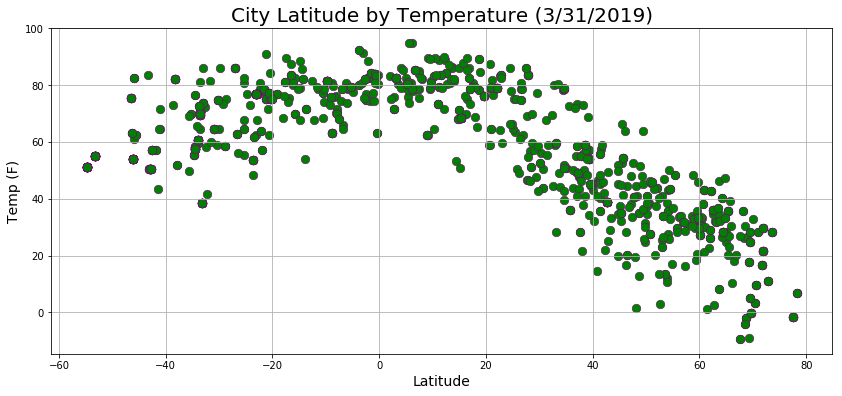

<Figure size 432x288 with 0 Axes>

In [8]:
weather_format['Latitude'] = pd.to_numeric(weather_format['Latitude'])
weather_format['Temp_Farenheit'] = pd.to_numeric(weather_format['Temp_Farenheit'])
weather_format['Humidity'] = weather_format['Humidity'].replace("%", "")


weather_format.plot(kind='scatter', x='Latitude', y='Temp_Farenheit', 
                    marker="o", grid=True, figsize=(14,6), linewidths = 0.50, 
                    edgecolors='purple', color='green', s=75,)

plt.title("City Latitude by Temperature (3/31/2019)", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Temp (F)", fontsize=14)
plt.show()
plt.savefig('report_files/latitude_temp.png', dpi=None, transparent=False,)


#### Latitude vs. Humidity Plot

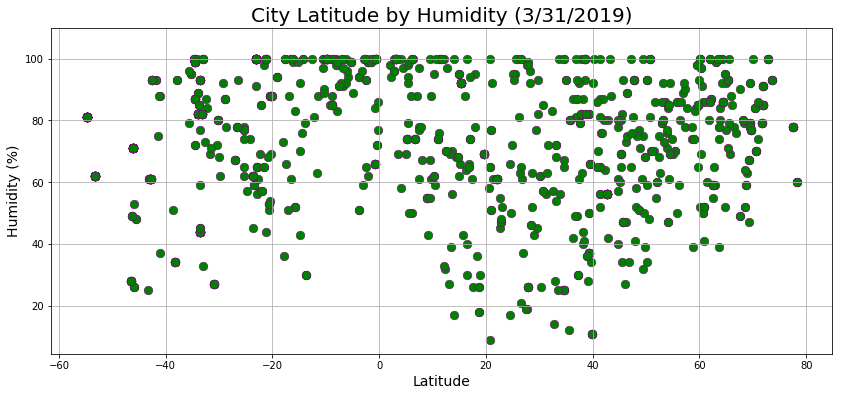

<Figure size 432x288 with 0 Axes>

In [9]:
weather_report['Latitude'] = pd.to_numeric(weather_report['Latitude'])
weather_report['Humidity'] = pd.to_numeric(weather_report['Humidity'])

weather_report.plot(kind='scatter', x='Latitude', y='Humidity', 
                    marker="o", grid=True, figsize=(14,6), linewidths = 0.50, 
                    edgecolors='purple', color='green', s=75,)

plt.title("City Latitude by Humidity (3/31/2019)", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.ylim(top=110)
plt.show()
plt.savefig('report_files/latitude_humid.png', dpi=None, transparent=False,)


#### Latitude vs. Cloudiness Plot

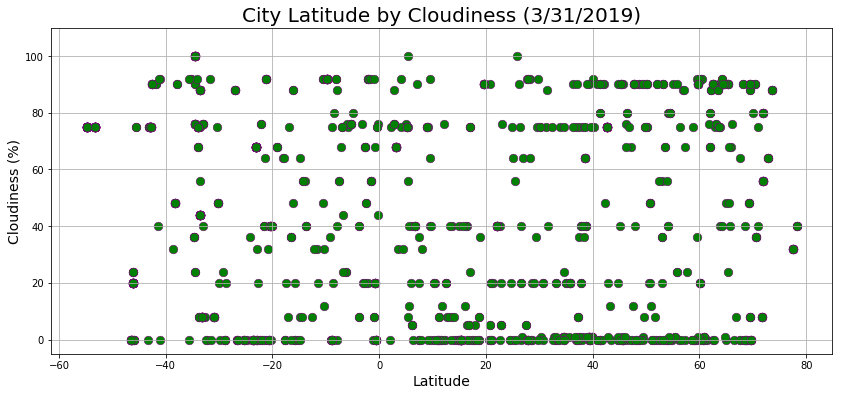

<Figure size 432x288 with 0 Axes>

In [10]:
weather_report['Latitude'] = pd.to_numeric(weather_report['Latitude'])
weather_report['Cloudiness'] = pd.to_numeric(weather_report['Cloudiness'])

weather_report.plot(kind='scatter', x='Latitude', y='Cloudiness', 
                    marker="o", grid=True, figsize=(14,6), linewidths = 0.50, 
                    edgecolors='purple', color='green', s=75,)

plt.title("City Latitude by Cloudiness (3/31/2019)", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.ylim(top=110)
plt.show()
plt.savefig('report_files/latitude_cloud.png', dpi=None, transparent=False,)


#### Latitude vs. Wind Speed Plot

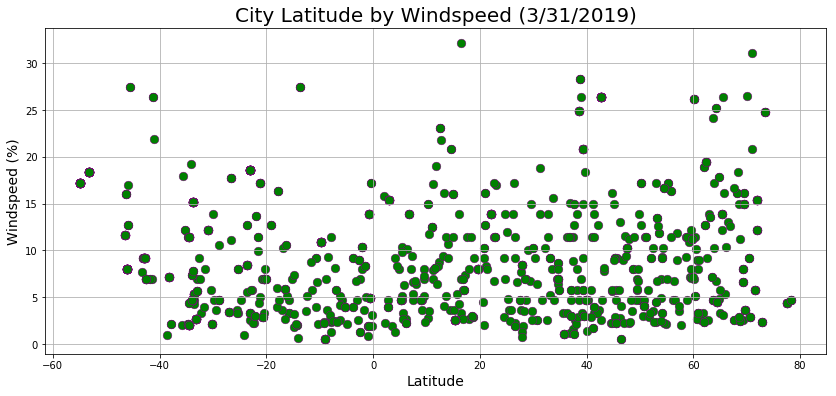

<Figure size 432x288 with 0 Axes>

In [11]:
weather_report['Latitude'] = pd.to_numeric(weather_report['Latitude'])
weather_report['Windspeed'] = pd.to_numeric(weather_report['Windspeed'])

weather_report.plot(kind='scatter', x='Latitude', y='Windspeed', 
                    marker="o", grid=True, figsize=(14,6), linewidths = 0.50, 
                    edgecolors='purple', color='green', s=75,)

plt.title("City Latitude by Windspeed (3/31/2019)", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Windspeed (%)", fontsize=14)

plt.show()
plt.savefig('report_files/latitude_wind.png', dpi=None, transparent=False,)
